In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sys

In [2]:
#Reading our dataset
dataset = pd.read_excel("dataset.xlsx")

In [3]:
#Seeing the columns of our dataset
dataset.columns

Index(['Date Of Test', 'Signal', 'Speed', 'Distance from site',
       'Call Test Duration', 'Call Test Result', 'Call Test Technology',
       'Call Test Setup Time', 'MOS'],
      dtype='object')

In [4]:
dataset.MOS.nunique()

35

In [5]:
dataset.MOS.unique()

array([2.1, 3.2, 1. , 3.6, 4.4, 3.7, 4.3, 3.8, 1.7, 2. , 3.3, 2.3, 2.7,
       3.1, 2.2, 1.4, 1.2, 4. , 2.4, 4.1, 1.3, 1.8, 2.5, 3.4, 4.2, 3. ,
       2.6, 3.5, 1.6, 2.9, 2.8, 1.5, 1.9, 3.9, 1.1])

In [6]:
dataset.MOS.value_counts()

4.4    31011
2.7    16228
1.0    15167
4.3    12528
2.1    12346
3.2     3221
3.3     1158
4.2     1078
2.6     1069
2.2      893
2.3      828
2.4      705
2.0      665
4.1      645
3.7      613
2.5      599
4.0      559
3.1      545
3.4      525
3.8      443
1.9      431
3.6      399
1.1      390
1.8      381
3.0      376
3.9      372
2.9      351
1.7      333
2.8      331
1.6      325
1.5      295
1.2      293
3.5      268
1.4      229
1.3      228
Name: MOS, dtype: int64

In [7]:
dataset.MOS.value_counts(bins=3)

(3.267, 4.4]      49599
(0.996, 2.133]    31083
(2.133, 3.267]    25146
Name: MOS, dtype: int64

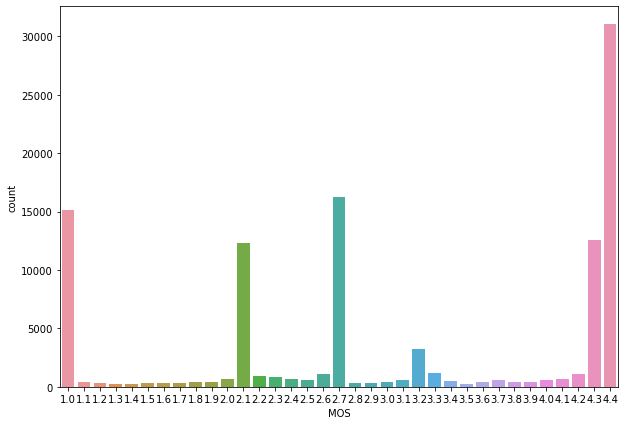

In [8]:
plt.figure(figsize=(10,7))
sns.countplot(x=dataset["MOS"])

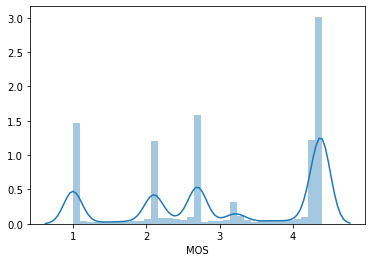

In [9]:
#Histogram of MOS
sns.distplot(dataset['MOS'])

In [10]:
#By seeing the above graph we can see that
#MOS value is required for determining the qos
#and we see that 
#MOS [1 - 2.6] means call quality is too bad
#MOS [2.6 - 3.6] means call quality is average
#MOS [3.6 - 4.4] means call quality is good
#So we cluster the value into one singular value
#MOS 1-2.6 = 2 (Bad Quality)
#MOS 2.6-3.6 = 3 (Average quality)
#MOS 3.6-4.4 = 4 (Good quality)

In [11]:
#This is to group the data in 3 catagories
dataset.loc[(dataset['MOS']>=1 )&(dataset['MOS']<=2.6),'MOS'] = 2
dataset.loc[(dataset['MOS']>2.6 )&(dataset['MOS']<=3.6),'MOS'] = 3
dataset.loc[(dataset['MOS']>3.6 )&(dataset['MOS']<=4.4),'MOS'] = 4   

In [12]:
plt.figure(figsize=(6,4))
dataset['MOS'].value_counts().plot(kind = 'pie')
plt.show()

In [13]:
dataset.groupby('Call Test Result')['MOS'].value_counts()

Call Test Result      MOS
FAILURE - DROP CALL   4.0      406
                      2.0      184
                      3.0       54
FAILURE - SETUP FAIL  4.0       25
                      2.0       11
SUCCESS               4.0    46818
                      2.0    34982
                      3.0    23348
Name: MOS, dtype: int64

In [14]:
result_replace = {
    "Call Test Result" : {
        "SUCCESS": 1,
        "FAILURE - SETUP FAIL": 0,
        "FAILURE - DROP CALL" : 0,
    }
}
dataset = dataset.replace(result_replace)

In [15]:
dataset.head()

Date Of Test  Signal      Speed  Distance from site  \
0 2017-07-01 00:00:27   -61.0  68.800003             1048.60   
1 2017-07-01 00:02:57   -61.0  68.769997             1855.54   
2 2017-07-01 00:05:29   -71.0  69.169998             1685.62   
3 2017-07-01 00:08:02   -65.0  69.279999             1770.92   
4 2017-07-01 00:10:30  -103.0   0.820000              256.07   

   Call Test Duration  Call Test Result Call Test Technology  \
0                90.0                 1                 UMTS   
1                90.0                 1                 UMTS   
2                90.0                 1                 UMTS   
3                90.0                 1                 UMTS   
4                60.0                 1                 UMTS   

   Call Test Setup Time  MOS  
0                  0.56  2.0  
1                  0.45  3.0  
2                  0.51  2.0  
3                  0.00  2.0  
4                  3.35  3.0

In [16]:
dataset.groupby('Call Test Result')['MOS'].value_counts()

Call Test Result  MOS
0                 4.0      431
                  2.0      195
                  3.0       54
1                 4.0    46818
                  2.0    34982
                  3.0    23348
Name: MOS, dtype: int64

In [17]:
dataset.groupby('Call Test Result')['MOS'].value_counts()

Call Test Result  MOS
0                 4.0      431
                  2.0      195
                  3.0       54
1                 4.0    46818
                  2.0    34982
                  3.0    23348
Name: MOS, dtype: int64

In [18]:
dataset['Distance from site'].describe()

count     95469.000000
mean       7797.172461
std       49584.213355
min           1.410000
25%         236.580000
50%         430.350000
75%         789.960000
max      745483.680000
Name: Distance from site, dtype: float64

In [19]:
 #convert an object to a datetime type
dataset["Date Of Test"]=pd.to_datetime(dataset['Date Of Test'])

In [20]:
import calendar
dataset['minute']=dataset['Date Of Test'].apply(lambda x:x.minute)
dataset['second']=dataset['Date Of Test'].apply(lambda x:x.second)
dataset['day']=dataset['Date Of Test'].apply(lambda x:x.day)
dataset['hour']=dataset['Date Of Test'].apply(lambda x:x.hour)
dataset['weekday']=dataset['Date Of Test'].apply(lambda x:calendar.day_name[x.weekday()])

In [21]:
dataset.drop(["Date Of Test"],axis = 1,inplace = True)
dataset.head()

Signal      Speed  Distance from site  Call Test Duration  \
0   -61.0  68.800003             1048.60                90.0   
1   -61.0  68.769997             1855.54                90.0   
2   -71.0  69.169998             1685.62                90.0   
3   -65.0  69.279999             1770.92                90.0   
4  -103.0   0.820000              256.07                60.0   

   Call Test Result Call Test Technology  Call Test Setup Time  MOS  minute  \
0                 1                 UMTS                  0.56  2.0       0   
1                 1                 UMTS                  0.45  3.0       2   
2                 1                 UMTS                  0.51  2.0       5   
3                 1                 UMTS                  0.00  2.0       8   
4                 1                 UMTS                  3.35  3.0      10   

   second  day  hour   weekday  
0      27    1     0  Saturday  
1      57    1     0  Saturday  
2      29    1     0  Saturday  
3       2    1     0  Saturday  
4      30    1     0  Saturday

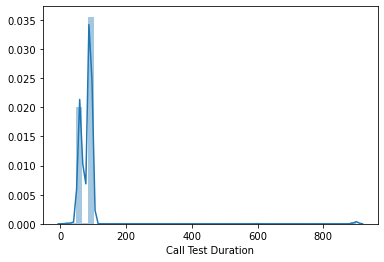

In [22]:
#Histogram of Call Test Duration
sns.distplot(dataset['Call Test Duration'])

In [23]:
from sklearn.preprocessing import LabelEncoder
wday = LabelEncoder()
dataset['Day']=wday.fit_transform(dataset['weekday'])

In [24]:
dataset.drop(['weekday'],axis = 1,inplace = True)

In [25]:
dataset.head()

Signal      Speed  Distance from site  Call Test Duration  \
0   -61.0  68.800003             1048.60                90.0   
1   -61.0  68.769997             1855.54                90.0   
2   -71.0  69.169998             1685.62                90.0   
3   -65.0  69.279999             1770.92                90.0   
4  -103.0   0.820000              256.07                60.0   

   Call Test Result Call Test Technology  Call Test Setup Time  MOS  minute  \
0                 1                 UMTS                  0.56  2.0       0   
1                 1                 UMTS                  0.45  3.0       2   
2                 1                 UMTS                  0.51  2.0       5   
3                 1                 UMTS                  0.00  2.0       8   
4                 1                 UMTS                  3.35  3.0      10   

   second  day  hour  Day  
0      27    1     0    2  
1      57    1     0    2  
2      29    1     0    2  
3       2    1     0    2  
4      30    1     0    2

In [26]:
dataset.groupby('Day')['MOS'].value_counts()

Day  MOS
0    4.0    8065
     2.0    4947
     3.0    3088
1    4.0    6203
     2.0    5517
     3.0    3845
2    4.0    7545
     2.0    5138
     3.0    3027
3    4.0    5797
     2.0    5029
     3.0    3152
4    4.0    6930
     2.0    5534
     3.0    3601
5    4.0    6842
     2.0    5319
     3.0    3693
6    4.0    5867
     2.0    3693
     3.0    2996
Name: MOS, dtype: int64

In [27]:
ctt = LabelEncoder()
dataset['Technology']=wday.fit_transform(dataset['Call Test Technology'])

In [28]:
dataset.drop(['Call Test Technology'],axis = 1,inplace = True)

In [29]:
dataset.head()

Signal      Speed  Distance from site  Call Test Duration  \
0   -61.0  68.800003             1048.60                90.0   
1   -61.0  68.769997             1855.54                90.0   
2   -71.0  69.169998             1685.62                90.0   
3   -65.0  69.279999             1770.92                90.0   
4  -103.0   0.820000              256.07                60.0   

   Call Test Result  Call Test Setup Time  MOS  minute  second  day  hour  \
0                 1                  0.56  2.0       0      27    1     0   
1                 1                  0.45  3.0       2      57    1     0   
2                 1                  0.51  2.0       5      29    1     0   
3                 1                  0.00  2.0       8       2    1     0   
4                 1                  3.35  3.0      10      30    1     0   

   Day  Technology  
0    2           2  
1    2           2  
2    2           2  
3    2           2  
4    2           2

In [30]:
dataset.isna().sum()

Signal                      7
Speed                       0
Distance from site      10359
Call Test Duration          0
Call Test Result            0
Call Test Setup Time        0
MOS                         0
minute                      0
second                      0
day                         0
hour                        0
Day                         0
Technology                  0
dtype: int64

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(),annot=True,linewidths=1)

In [32]:
#Deleting the distance when the value is NaN
dataset = dataset.dropna()

In [33]:
dataset.isna().sum()

Signal                  0
Speed                   0
Distance from site      0
Call Test Duration      0
Call Test Result        0
Call Test Setup Time    0
MOS                     0
minute                  0
second                  0
day                     0
hour                    0
Day                     0
Technology              0
dtype: int64

In [34]:
#Describe the data and understand it
dataset.describe()

Signal         Speed  Distance from site  Call Test Duration  \
count  95466.000000  95466.000000        95466.000000        95466.000000   
mean     -77.673088      8.149201         7797.355959           83.893722   
std       18.222605     17.430856        49584.980608           66.531138   
min     -140.000000     -1.000000            1.410000           12.900000   
25%      -89.000000      0.000000          236.580000           60.000000   
50%      -79.000000      0.000000          430.315000           90.000000   
75%      -63.000000      7.240000          789.960000           90.000000   
max      -51.000000     86.310516       745483.680000          900.000000   

       Call Test Result  Call Test Setup Time           MOS        minute  \
count      95466.000000          95466.000000  95466.000000  95466.000000   
mean           0.994721              2.756107      3.077200     29.558942   
std            0.072468              2.035408      0.873206     17.297417   
min            0.000000              0.000000      2.000000      0.000000   
25%            1.000000              0.670000      2.000000     15.000000   
50%            1.000000              3.570000      3.000000     30.000000   
75%            1.000000              4.100000      4.000000     45.000000   
max            1.000000             45.330000      4.000000     59.000000   

             second           day          hour           Day    Technology  
count  95466.000000  95466.000000  95466.000000  95466.000000  95466.000000  
mean      29.477102     15.981784     12.517598      2.932845      1.707477  
std       17.310032      9.022779      6.198500      1.974717      0.472986  
min        0.000000      1.000000      0.000000      0.000000      0.000000  
25%       14.000000      9.000000      8.000000      1.000000      1.000000  
50%       30.000000     15.000000     13.000000      3.000000      2.000000  
75%       44.000000     25.000000     18.000000      5.000000      2.000000  
max       59.000000     31.000000     23.000000      6.000000      2.000000

In [35]:
#Now we have to remove the outliers

In [36]:
#This is a function to delete the outliers from the dataframe
def remove_outlier(df_in,col_name):
    q1=df_in[col_name].quantile(0.25)
    q3=df_in[col_name].quantile(0.75)
    iqr=q3-q1
    fence_low=q1-1.5*iqr
    fence_high=q3+1.5*iqr
    df_out=df_in.loc[(df_in[col_name]>fence_low) & (df_in[col_name]<fence_high)]
    return df_out

In [37]:
sns.distplot(dataset['Signal'])

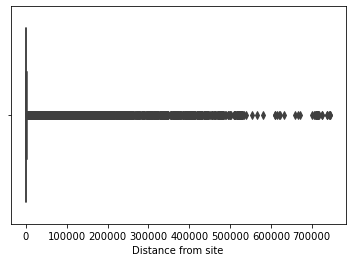

In [38]:
sns.boxplot('Distance from site',data=dataset)

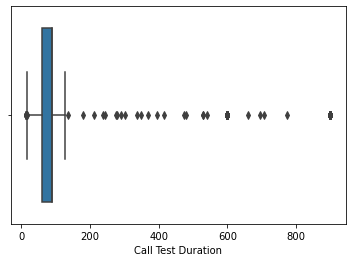

In [39]:
sns.boxplot('Call Test Duration',data=dataset)

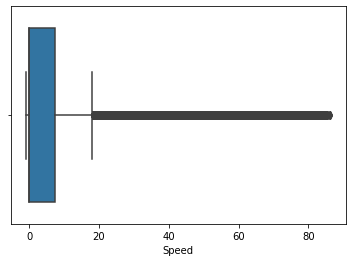

In [40]:
sns.boxplot('Speed',data=dataset)

In [41]:
#Removing outliers from Distance From Site where we decide that no call can't be connected when the distance is above 35 KM
dataset = dataset[(dataset['Distance from site'] < 35000)]

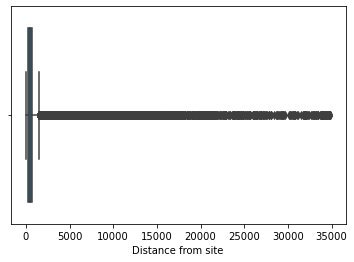

In [42]:
sns.boxplot('Distance from site',data=dataset)

In [43]:
#Now we can see that the data is much cleaner
dataset.describe()

Signal         Speed  Distance from site  Call Test Duration  \
count  92748.000000  92748.000000        92748.000000        92748.000000   
mean     -77.789386      8.043043          923.011613           83.624358   
std       18.206840     17.284510         2366.750678           66.453767   
min     -140.000000     -1.000000            1.410000           12.900000   
25%      -89.000000      0.000000          231.340000           60.000000   
50%      -79.000000      0.000000          424.025000           90.000000   
75%      -63.000000      7.080000          739.410000           90.000000   
max      -51.000000     86.310516        34839.550000          900.000000   

       Call Test Result  Call Test Setup Time           MOS        minute  \
count      92748.000000          92748.000000  92748.000000  92748.000000   
mean           0.995127              2.808262      3.076476     29.549963   
std            0.069640              2.016235      0.872626     17.300790   
min            0.000000              0.000000      2.000000      0.000000   
25%            1.000000              0.690000      2.000000     15.000000   
50%            1.000000              3.600000      3.000000     30.000000   
75%            1.000000              4.110000      4.000000     45.000000   
max            1.000000             45.330000      4.000000     59.000000   

             second           day          hour           Day    Technology  
count  92748.000000  92748.000000  92748.000000  92748.000000  92748.000000  
mean      29.481056     15.942791     12.500431      2.940473      1.709169  
std       17.311989      9.077676      6.200223      1.979322      0.472144  
min        0.000000      1.000000      0.000000      0.000000      0.000000  
25%       15.000000      8.000000      8.000000      1.000000      1.000000  
50%       30.000000     15.000000     13.000000      3.000000      2.000000  
75%       44.000000     25.000000     18.000000      5.000000      2.000000  
max       59.000000     31.000000     23.000000      6.000000      2.000000

In [44]:
#Model Training
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [45]:
#Logistic Regression
x=dataset.drop('MOS',axis=1)
y=dataset['MOS']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [46]:
#Logistic Regression Prediction
predictions=logmodel.predict(x_test)
y_test

92555    2.0
61144    3.0
1853     3.0
44277    4.0
32360    3.0
        ... 
14934    2.0
11679    3.0
72889    4.0
51227    4.0
19290    2.0
Name: MOS, Length: 27825, dtype: float64

In [47]:
#Accuracy score
Logistic_Regression_Accuracy = accuracy_score(y_test,predictions)*100
print(Logistic_Regression_Accuracy)

51.81671159029649


In [48]:
#Confusion matrix
res=confusion_matrix(y_test,predictions)
res

array([[5162,  300, 4037],
       [3164,  292, 2973],
       [2748,  185, 8964]], dtype=int64)

In [49]:
#Decision Tree
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
classifier_entropy=DecisionTreeClassifier(criterion='entropy',random_state=100)
classifier_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=100)

In [50]:
#Prediction
y_pred=classifier_entropy.predict(x_test)
print(y_pred)

[4. 2. 2. ... 2. 4. 4.]


In [51]:
#Accuracy Score
Decision_Tree_Accuracy = accuracy_score(y_test,y_pred)*100
print("Accuracy score : ",Decision_Tree_Accuracy)

Accuracy score :  62.0125786163522


In [52]:
#Confusion matrix
ress=confusion_matrix(y_test,y_pred)
print(ress)

[[5657 2462 1551]
 [2389 2697 1302]
 [1593 1273 8901]]


In [53]:
#KNN
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)
classifier=KNeighborsClassifier(n_neighbors=19,p=2,metric='euclidean')
classifier.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=19)

In [54]:
#Prediction
y_pred=classifier.predict(x_test)
y_pred

array([4., 2., 3., ..., 4., 3., 2.])

In [55]:
#Accuracy Score
KNN_Accuracy = accuracy_score(y_test,y_pred)*100
print("Accuracy score : ",KNN_Accuracy)

Accuracy score :  63.26145552560647


In [56]:
#NB Model
model = GaussianNB()
features=x_train
label=y_train
model.fit(features,label)

GaussianNB()

In [57]:
#Prediction
predicted= model.predict(x_test)
print(predicted)

[4. 4. 4. ... 4. 3. 3.]


In [58]:
#Accuracy Score
NB_Accuracy = accuracy_score(y_test,predicted)*100
print("Accuracy score : ",NB_Accuracy)

Accuracy score :  53.41239892183288


In [59]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)
predicted=model.predict(x_test)
Random_Forest_Accuracy = accuracy_score(y_test,predicted)*100
print('Accuracy :' ,Random_Forest_Accuracy)
print(confusion_matrix(y_test, predicted))

Accuracy : 71.18059299191376
[[4715 1271  356]
 [1526 2329  472]
 [ 980  741 6160]]


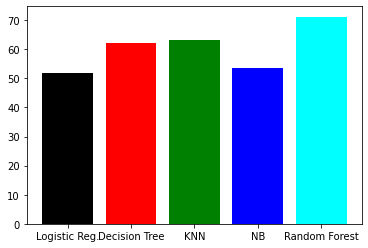

In [60]:
a = ['Logistic Reg.','Decision Tree','KNN','NB','Random Forest']
b = [Logistic_Regression_Accuracy,Decision_Tree_Accuracy,KNN_Accuracy,NB_Accuracy,Random_Forest_Accuracy]
plt.bar(a,b,color = ['black','red','green','blue','cyan'])
plt.show()